In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


kcc = pd.read_csv('D:\Flation\mod_2\Project2\Mod_2_Project/Mod_2 _Project/data_files/kc_cleaned.csv')
kcc.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
0,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
1,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
2,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
3,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
4,5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


In [2]:
kcc.drop(['Unnamed: 0'], axis=1, inplace=True)
kcc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
1,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
4,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


In [3]:
data_corr = kcc[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_basement']]
data_corr.head()

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot,sqft_basement
0,3,2.25,2570,1690,7242,400.0
1,2,1.00,770,2720,10000,0.0
2,4,3.00,1960,1360,5000,910.0
3,3,2.00,1680,1800,8080,0.0
4,4,4.50,5420,4760,101930,1530.0


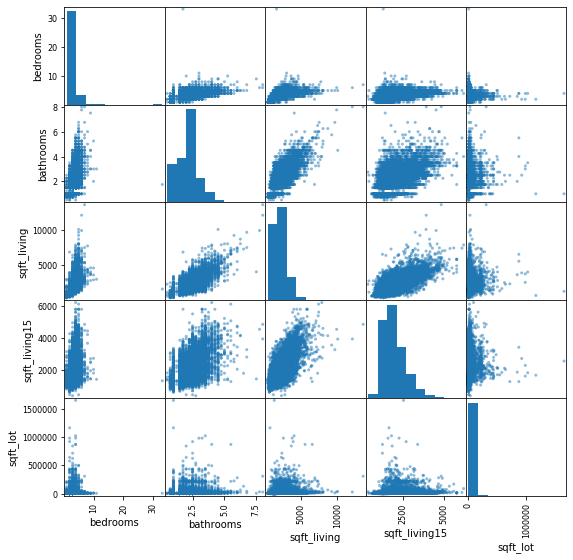

In [4]:
pd.plotting.scatter_matrix(data_corr,figsize  = [9, 9]);
plt.show()

In [5]:
data_corr.corr()

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot
bedrooms,1.000000,0.516188,0.578211,0.393108,0.029407
bathrooms,0.516188,1.000000,0.756341,0.570061,0.085094
sqft_living,0.578211,0.756341,1.000000,0.755647,0.173345
sqft_living15,0.393108,0.570061,0.755647,1.000000,0.146238
sqft_lot,0.029407,0.085094,0.173345,0.146238,1.000000


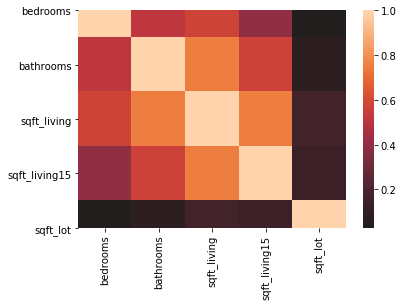

In [6]:
import seaborn as sns
sns.heatmap(data_corr.corr(), center=0);
#Looks like (Bathrooms vs sqft_living) and (sqft_living vs sqft_living15) show a high correlation.

In [7]:
kcc.drop(['bathrooms', 'sqft_living15'], axis=1, inplace=True)
kcc.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,yrs_renovated,sale_month
0,6414100192,12/9/2014,538000.0,3,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,29.0,12
1,5631500400,2/25/2015,180000.0,2,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,0.0,2
2,2487200875,12/9/2014,604000.0,4,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,0.0,12
3,1954400510,2/18/2015,510000.0,3,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,0.0,2
4,7237550310,5/12/2014,1230000.0,4,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,0.0,5


In [8]:
continuous = ['price', 'sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'floors', 'condition', 'waterfront', 'grade', 'zipcode', 'sale_month']

In [9]:
kcc_ohe = pd.get_dummies(kcc[categoricals], columns=['bedrooms', 'floors','condition', 'waterfront', 'grade', 'zipcode', 'sale_month'])
kcc_ohe = kcc_ohe.astype('float')

In [10]:
# # Log transform and normalize
kcc_cont = kcc[continuous]

# # log features
# log_names = [f'{column}_log' for column in kcc_cont.columns]

# kcc_log = np.log(kcc_cont)
# kcc_log.columns = log_names

# # normalize (subract mean and divide by std)
# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# kcc_log_norm = kcc_log.apply(normalize)


In [11]:
preprocessed_log = pd.concat([kcc_cont, kcc_ohe], axis=1)
preprocessed_log.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,538000.0,2570,7242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,180000.0,770,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,604000.0,1960,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,510000.0,1680,8080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1230000.0,5420,101930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
preprocessed_log.columns = [col.replace('.', '_') for col in preprocessed_log.columns]
preprocessed_log.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,538000.0,2570,7242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,180000.0,770,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,604000.0,1960,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,510000.0,1680,8080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1230000.0,5420,101930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X = preprocessed_log.drop('price', axis=1)
y = preprocessed_log['price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Using a test size of 20%

In [16]:
df = pd.concat([y_train, X_train], axis=1)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15376 entries, 8153 to 4790
Columns: 120 entries, sqft_living to sale_month_12
dtypes: float64(118), int64(2)
memory usage: 14.2 MB


In [18]:
outcome = y_train
x_cols = X_train

In [19]:
x_cols.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       ...
       'sale_month_3', 'sale_month_4', 'sale_month_5', 'sale_month_6',
       'sale_month_7', 'sale_month_8', 'sale_month_9', 'sale_month_10',
       'sale_month_11', 'sale_month_12'],
      dtype='object', length=120)

In [20]:
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,price,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
8153,529000.0,-0.631816,-0.189439,-0.096886,-0.38288,1.095135,-0.683583,-0.285112,-0.109442,-0.037852,...,-0.308338,-0.340193,-0.354537,-0.332165,-0.336493,-0.316738,-0.295124,-0.302356,-0.269332,-0.276213
2558,450000.0,-0.707684,-0.285203,-0.096886,-0.38288,1.095135,-0.683583,-0.285112,-0.109442,-0.037852,...,-0.308338,-0.340193,-0.354537,3.010355,-0.336493,-0.316738,-0.295124,-0.302356,-0.269332,-0.276213
15977,850000.0,1.351593,-0.272391,-0.096886,-0.38288,-0.913070,1.462786,-0.285112,-0.109442,-0.037852,...,-0.308338,-0.340193,-0.354537,3.010355,-0.336493,-0.316738,-0.295124,-0.302356,-0.269332,-0.276213
1985,600000.0,-0.198284,0.777365,-0.096886,-0.38288,1.095135,-0.683583,-0.285112,-0.109442,-0.037852,...,-0.308338,-0.340193,-0.354537,-0.332165,2.971637,-0.316738,-0.295124,-0.302356,-0.269332,-0.276213
4433,525000.0,-0.122416,-0.173844,-0.096886,-0.38288,1.095135,-0.683583,-0.285112,-0.109442,-0.037852,...,-0.308338,-0.340193,-0.354537,-0.332165,-0.336493,-0.316738,-0.295124,3.307140,-0.269332,-0.276213


In [21]:
predictors = '+'.join(x_cols.columns)
predictors

'sqft_living+sqft_lot+bedrooms_1+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bedrooms_7+bedrooms_8+bedrooms_9+bedrooms_10+bedrooms_11+bedrooms_33+floors_1_0+floors_1_5+floors_2_0+floors_2_5+floors_3_0+floors_3_5+condition_1+condition_2+condition_3+condition_4+condition_5+waterfront_0_0+waterfront_1_0+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+zipcode_98001+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


outcome = 'price'
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df).fit()
ax.set_ylim([y.min()-0.05, y.max()+0.05])
except ValueError:  #raised if `y` is empty.
    pass
model.summary()

SyntaxError: invalid syntax (<ipython-input-23-4b33e2e8432e>, line 9)

In [ ]:
import scipy.stats as stats
import statsmodels.stats.api as sms


# results = []
# for idx, column in enumerate(df.columns):
#     print (f"KCC - Regression Analysis and Diagnostics for SalePrice~{column}")
#     print ("-------------------------------------------------------------------------------------")

#     f = f'price~{column}'
#     model = smf.ols(formula=f, data=df).fit()
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#     fig.tight_layout()
#     plt.show()
    
#     results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
#     input("Press Enter to continue...")

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

In [ ]:
plt.scatter(model.predict(x_cols), model.resid)
plt.plot(model.predict(x_cols), [0 for i in range(len(df))])

In [ ]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['MPG_Highway'].quantile(q=q)))